In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def funcao(x, func='sigmoid'):
    
    if func == 'reta':
        f_x = 3*x
    elif func == 'parabola':
        f_x = x**2
    elif func == 'seno':
        f_x = np.sin(x)
    elif func == 'relu':
        f_x = np.maximum(0, x)
    elif func == 'tanh':
        f_x = np.tanh(x)
    else:
        f_x = 1/(1 + np.exp(-x))
    
    return f_x

In [3]:
def derivada(x, func='sigmoid'):
    
    if func == 'reta':
        x_deriv = 3
    elif func == 'parabola':
        x_deriv = 2*x
    elif func == 'seno':
        x_deriv = np.cos(x)
    elif func == 'tanh':
        x_deriv = (1 - (np.tanh(x) ** 2))
    elif func == 'relu':
        x_deriv = np.where(x <= 0, 0, 1)
    else:
        x_deriv = (1/(1 + np.exp(-x))) * (1 - (1/(1 + np.exp(-x))))
    
    return x_deriv

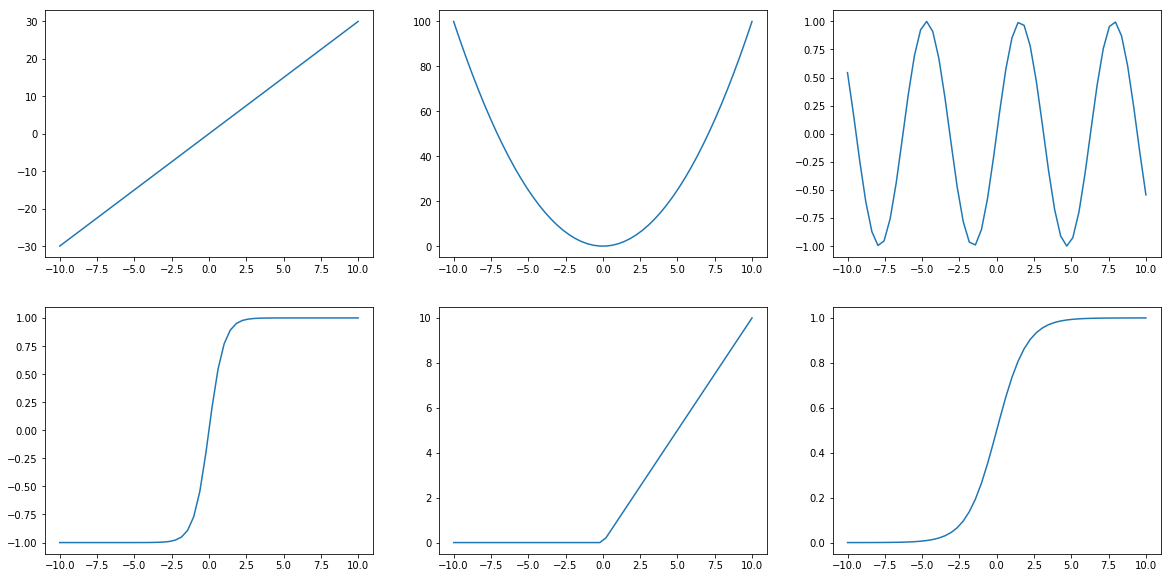

In [4]:
#reta = lambda x: 3*x
#parabola = lambda x: x**2
#sigmoid = lambda x: 1/(1 + np.exp(-x)) 

x = np.linspace(-10, 10)

plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.plot(x, funcao(x, func='reta'))

plt.subplot(2, 3, 2)
plt.plot(x, funcao(x, func='parabola'))

plt.subplot(2, 3, 3)
plt.plot(x, funcao(x, func='seno'))

plt.subplot(2, 3, 4)
plt.plot(x, funcao(x, func='tanh'))

plt.subplot(2, 3, 5)
plt.plot(x, funcao(x, func='relu'))

plt.subplot(2, 3, 6)
plt.plot(x, funcao(x, func='sigmoid'))

plt.show()

In [5]:
def execute(x_new, epochs, lr, func='sigmoid'):
    
    x_prev = 0
    x_values, y_values = [x_new], [funcao(x_new, func)]
    
    cont = 0
    while abs(x_new - x_prev) > 0.001 and cont < epochs:
        
        x_prev = x_new
        
        d_x = derivada(x_prev, func)
        x_new = x_prev - (lr * d_x)
        
        x_values.append(x_new)
        y_values.append(funcao(x_new, func))
        
        cont+=1
        
    print (f"Mínimo local ocorreu em: x={str(x_new)}, y={str(funcao(x_new, func))} [{x_new - x_prev}]")
    print ("Épocas executadas: " + str(cont))
    
    return x_values, y_values

Mínimo local ocorreu em: x=0.012379400392853806, y=0.00015324955408658894 [-0.003094850098213451]
Épocas executadas: 30


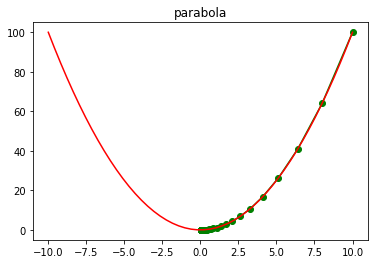

In [6]:
x_start = 10
epochs = 30
lr = 0.1
func = 'parabola'
x_values, y_values = execute(x_start, epochs, lr, func)



x = np.linspace(-10, 10)

plt.subplot(1, 1, 1)
plt.scatter(x_values, y_values,c="g")
plt.plot(x_values, y_values,c="g")
plt.plot(x, funcao(x, func), c="r")
plt.title(func)
plt.show()